# Loading Dataset & Quick Overview

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
from sklearn.datasets import load_boston

%matplotlib inline
rcParams['figure.figsize'] = 15, 15
# 讀取資料
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [2]:
print(data.shape)  # data ==> Features
print(target.shape)  # target ==> Label

(506, 13)
(506,)


In [ ]:
#print(data.DESCR)

# Plot Features V.S. Y
Can you explain the relation between other features with house prices?

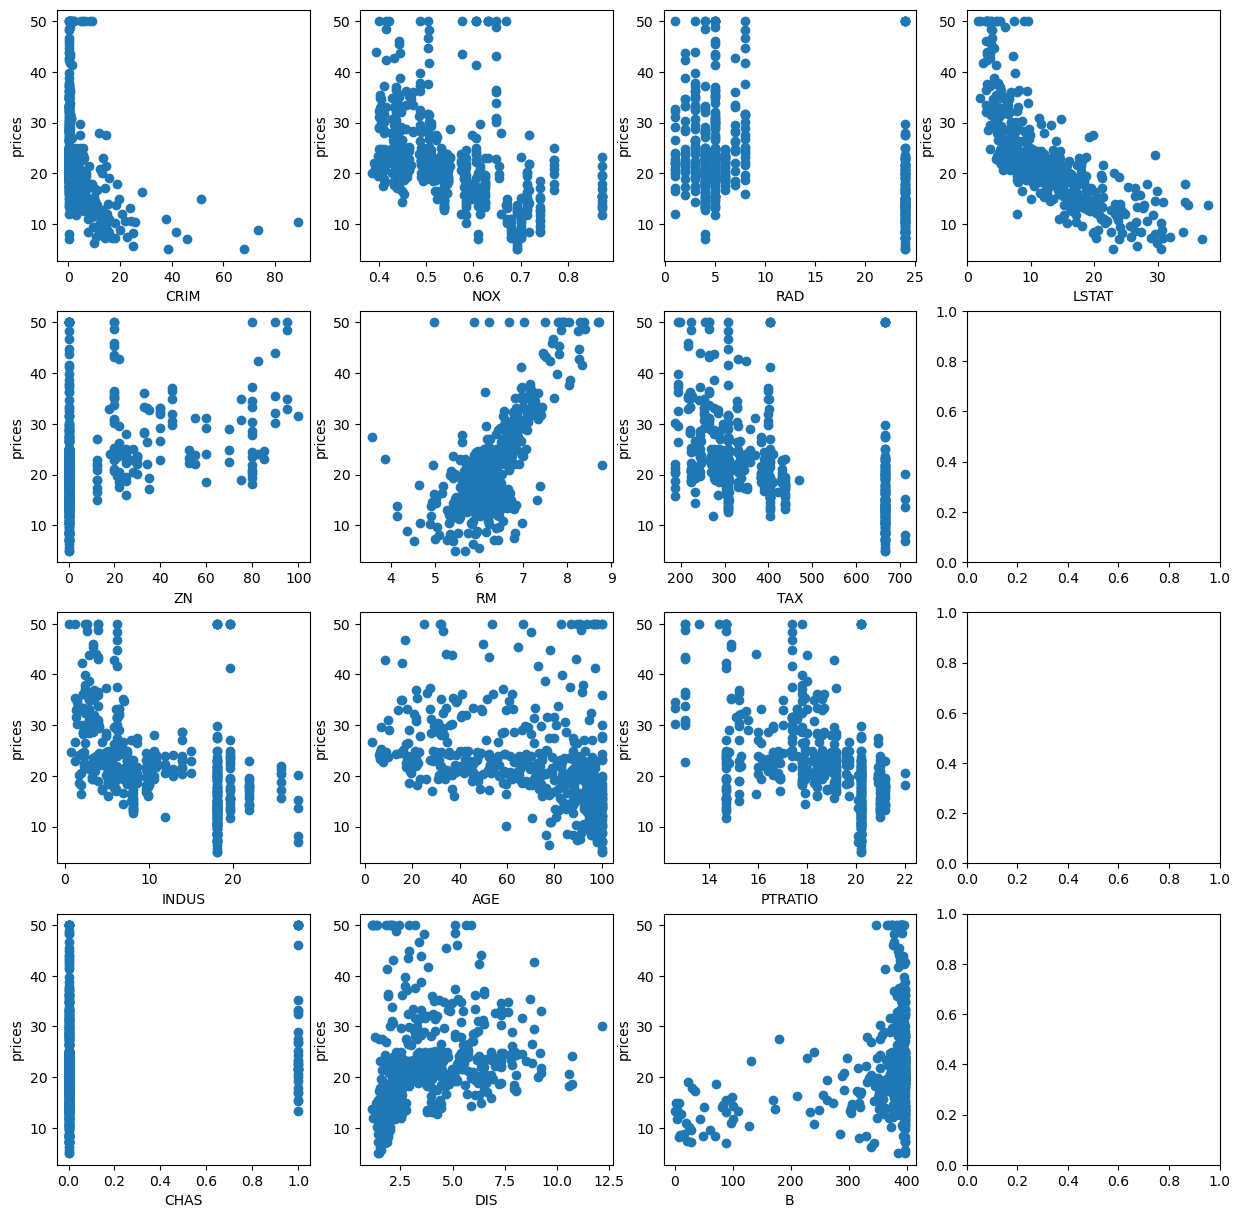

In [3]:
import math

features = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
    'PTRATIO', 'B', 'LSTAT'
]

fig, axes = plt.subplots(4, 4)
for i in range(13):
    x_f = i % 4
    y_f = math.floor((i) / 4)
    axes[x_f, y_f].scatter(data[:, i], target)
    axes[x_f, y_f].set_xlabel(features[i])
    axes[x_f, y_f].set_ylabel('prices')
plt.show()
"""
- CRIM     per capita crime rate by town
- ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS    proportion of non-retail business acres per town
- CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX      nitric oxides concentration (parts per 10 million)
- RM       average number of rooms per dwelling
- AGE      proportion of owner-occupied units built prior to 1940
- DIS      weighted distances to five Boston employment centres
- RAD      index of accessibility to radial highways
- TAX      full-value property-tax rate per $10,000
- PTRATIO  pupil-teacher ratio by town
- B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT    % lower status of the population
"""
pass

# Predicting Home Prices: SVR
在沒有做任何new feature生成的情況下，是否可以讓SVR的performance接近linear regression?

In [4]:
X = data
y = target

In [5]:
# import needed models in scikit-learn by yourself
# and fit a linear model using training dataset
import sklearn.svm as svm

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=42,
                                                    shuffle=True)

model = svm.SVR(kernel='poly', gamma=1e-2, degree=2, C=0.1)
model.fit(X_train, y_train)

SVR(C=0.1, degree=2, gamma=0.01, kernel='poly')

# Make Prediciton with SVC

In [6]:
#make predictions with SVM
y_pred = model.predict(X_test)

# Evaluation 
利用Root mean square或 mean absolute error來評估結果，看看是否有辦法做的比
linear regression好

RMS: 4.034779437991794
R2:0.77


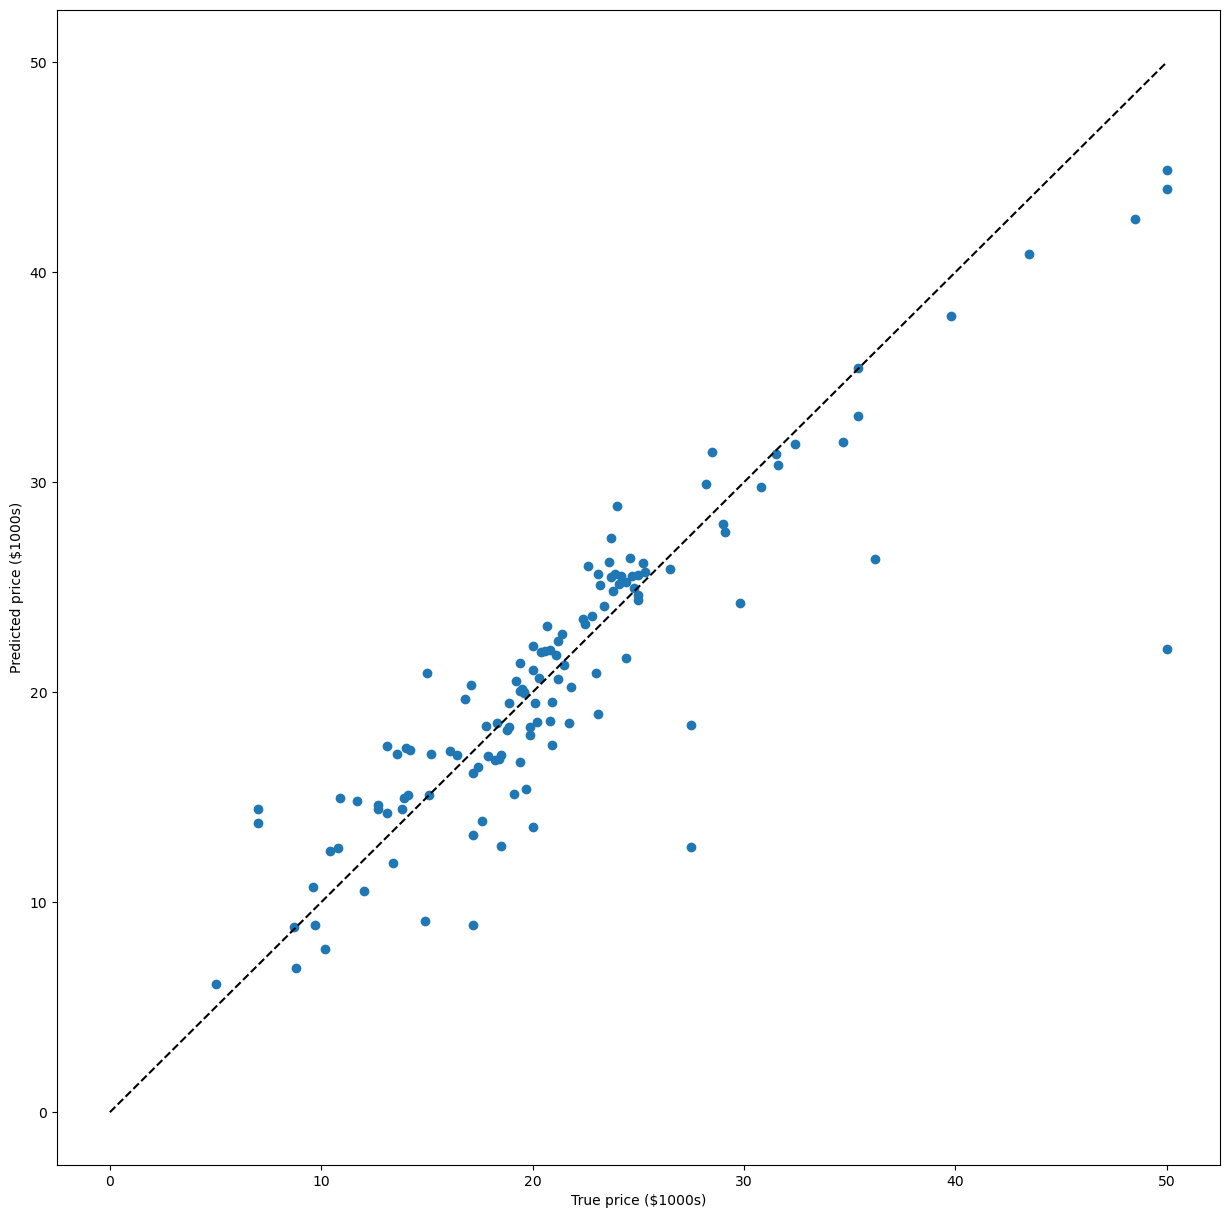

In [7]:
from sklearn import metrics
# visualize the result
%matplotlib inline
plt.scatter(y_test, y_pred)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
print("RMS:", np.sqrt(np.mean((y_pred - y_test)**2)))
print('R2:%.2f' % metrics.r2_score(y_test, y_pred))